In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('/tmp/data', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
sample = mnist.train.images[1].reshape(28,28)

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

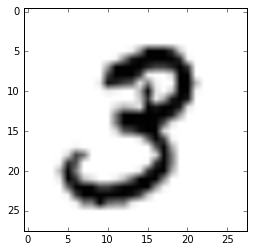

In [11]:
plt.imshow(sample, cmap = 'Greys')

### build a multilayer perceptron to take in the pixel data and correctly classify what number it represents
1. Learning rate is how quickly we adjust the cost function! How quickly do you want to apply the adam optimizer to the layer!
2. Training epochs is how many training cycles this will go through...
3. Batch size, the size of the batches of the training data

In [12]:
learning_rate = 0.001 # <-- the lower the rate, the higher the possibility for accurate training result??!!
# but it will take longer to run if the rate is lower~
training_epochs = 15
batch_size = 100

### Network parameters

In [13]:
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784 # the input is the flatten version of the array.

In [14]:
n_samples

55000

### The number of neurons we use in the two layers

In [15]:
n_hidden_1 = 256
n_hidden_2 = 256

#### Process breakdown ####
1. We will take the input and send them to the first hidden layer
2. The data will have a weight attached to it after it went through the first hidden layer
3. Add a bias along with that
4. Continue the same step 2 and 3 in the hidden layer 2.
5. Finally we will have the output layer
6. Evaluate the model performance

### loss function, cost function <-- apply an optimization to the cost, lower the rate.

In [16]:
# adam optimizer is the most common one

In [17]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: data input
    weights: a dictionary containing weights
    biases: a dictionary containing biases
    '''
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # doing matrix multiplication between the input and the first layer weights
    # doing this using tf objects
    # past the whole thing into the function, the rectifier function
    layer_1 = tf.nn.relu(layer_1)
    
    # do the same thing to layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In order for tf to work, we will need to create two tf objects: tf variables as weights and biases to feed the multilayer perceptron.
A variable is a modifiable tensor lives in the tf graph computation...?

In [18]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), # 784 rows, 256 col, thus can multiply with the x input (which has the length of 784)
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), # the shape changes since we got the result from first layer is 256, thus here we will use 256 rows * 256 cols Matrix
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes])) # the output from layer 2 is 256, thus multiply by the matrix with 256 rows and 10 cols to make the final output be a vector length of 10.
}

In [19]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### Finally create 2 placeholders for x and y

In [20]:
x = tf.placeholder('float', [None, n_input])  # the shape of the input matrix is None*784

In [21]:
y = tf.placeholder('float', [None, n_classes])

In [22]:
pred = multilayer_perceptron(x, weights, biases)

In [23]:
type(x)

tensorflow.python.framework.ops.Tensor

### Next thing is to define Cost Optimization Function

In [24]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [43]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [25]:
t = mnist.train.next_batch(1) #<- a tuple containing samples and the labels

In [26]:
xsamp, ysamp = t # x is the sample array, y is the output array

In [51]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [47]:
xsamp.shape

(1, 784)

### Training the Model!

In [28]:
sess = tf.InteractiveSession()

1. initialize the variables created by us

In [29]:
init = tf.global_variables_initializer()

In [30]:
sess.run(init)

In [31]:
# 15 loops
for epoch in range(training_epochs):
    
    # cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/ batch_size) # how many batches we will do when we use that sample size...
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict= {x: batch_x, y: batch_y})
        
        avg_cost += c / total_batch
        
    print  'Epoch: {}, cost{:.4f}'.format(epoch+1, avg_cost)
    
print 'Model has completed {} Epochs of training'.format(training_epochs)

Epoch: 1, cost190.5091
Epoch: 2, cost43.5501
Epoch: 3, cost27.4293
Epoch: 4, cost19.3924
Epoch: 5, cost13.8917
Epoch: 6, cost10.3845
Epoch: 7, cost7.8271
Epoch: 8, cost5.9339
Epoch: 9, cost4.2931
Epoch: 10, cost3.3925
Epoch: 11, cost2.5056
Epoch: 12, cost2.0139
Epoch: 13, cost1.5718
Epoch: 14, cost1.1658
Epoch: 15, cost0.9135
Model has completed 15 Epochs of training


### TF Built-in Model Evaluation Functions?

In [32]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [33]:
correct_pred = tf.cast(correct_pred, 'float')

In [34]:
print correct_pred

Tensor("Cast_1:0", shape=(?,), dtype=float32)


In [35]:
accuracy  = tf.reduce_mean(correct_pred) # need tf own methods to deal with tensor objects to get the mean

In [36]:
print accuracy #<-- still a tensor object...

Tensor("Mean_1:0", shape=(), dtype=float32)


In [37]:
tf.argmax(mnist.test.labels[0], 1)

<tf.Tensor 'ArgMax_2:0' shape=() dtype=int64>

In [39]:
len(mnist.test.labels)

10000

In [41]:
mnist.test.images[1].reshape(28, 28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [42]:
accuracy.eval(feed_dict= {
        x: mnist.test.images,
        y: mnist.test.labels
    })

0.9443

### code used to generate multilayer perceptron in the exercise
key points: 
1. transform the y_train and y_test to the one-hot encoding format 2D array
2. without the convenient way to do next_batch(), grab the batches using for-loop

In [ ]:
# y_train[ :batch_size] #<-- this is not what we want... we want the one_hot coding!
# how to transform y_train to a 2d array?? cols are two classes
# y_train.shape
y_train_transform = np.zeros((y_train.shape[0], 2))
y_train_transform[np.arange(y_train.shape[0]), y_train] = 1
# y_train_transform.shape

# need to do the same to y_test.
y_test_transform = np.zeros((len(y_test), 2))
y_test_transform[np.arange(len(y_test)), y_test] = 1
# y_test_transform

In [ ]:
for epoch in range(training_epochs):
    # cost
    avg_cost = 0.0
    
    total_batch = int(n_samples / batch_size)
    
    for i in range(total_batch):
        
        batch_x = X_train[batch_size*i:(batch_size*(i + 1))]
        batch_y = y_train_transform[batch_size*i:(batch_size*(i + 1))]
        
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y:batch_y})
        
        avg_cost += c / total_batch
        
    print 'Epoch: {}, cost: {:.4f}'.format(epoch + 1, avg_cost)
    
print 'Model has completed {} Epochs of training'.format(training_epochs)